<a href="https://colab.research.google.com/github/dacardonave/COVID-19/blob/master/Analisis_Comparativo_Metodos_de_Regresion_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis comparativo de los metodos de regresion 
## Analitica de datos
#### Daniel Cardona Velasquez
#### Universidad Nacional De Colombia



A continuacion presentaremos un analisis comparativo de algunos metodos de regresion ya implementados por algunas librerias en python para el entrenamiento de un modelo predictivo. En este caso en particualar, trabajaremos en una base de datos sobre el Covd-19, previamente filtrada y depurada para su entrenamiento y analisis en colombia.

In [1]:
#Importando algunas librerias de tratamiento y representacion
#Cargando el dataset sobre el que vamos a trabajar
#!pip install wget
#import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#datos covid19 - mundo
url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"

#datos Colombia
#url = "https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD"

#wget.download(url, 'covid.csv')
Xd = pd.read_csv(url)
Xd.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25


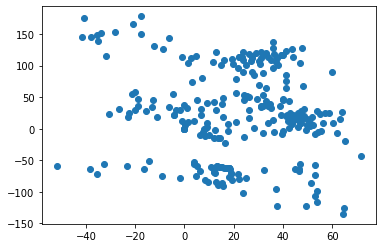

In [2]:
#Distribucion de los datos
plt.scatter(Xd['Lat'],Xd['Long'])

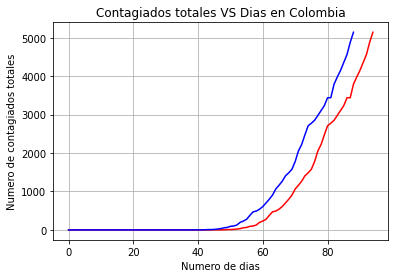

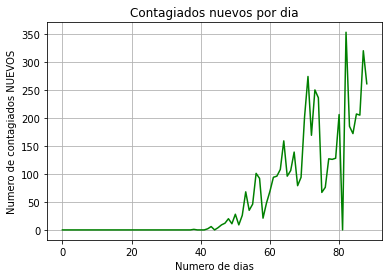

In [3]:
#funcion ventaneo --> esta funcion crea una ventana de w dias
def covid_win(serie,w=5):
    pi =0
    pf = w
    X = serie[pi:pf].reshape(1,-1)
    y = serie[pf+1].reshape(1,-1)
    pi += 1
    pf+= 1
    while pf+1 < serie.shape[0]:
      X = np.append(X,serie[pi:pf].reshape(1,-1),axis=0)
      y = np.append(y,serie[pf+1].reshape(1,-1),axis=0)
      pi += 1
      pf+=1
    return X, y # X \in Real^{N x P = w}, y \in Real^N


ii = Xd[Xd.columns[1]] == 'Colombia'
#print(np.where(ii)[0][0])
#contagios  acumulados
serie = np.array(Xd.iloc[np.where(ii)[0][0],4:])
#numero contagiados por dia
serie_d = np.append(0,np.diff(serie))
#serie_d = np.append(0,np.cumsum(np.diff(serie)))
X,y = covid_win(serie,w=5)
X_d,y_d = covid_win(serie_d,w=5)

plt.plot(serie,'r')
plt.plot(y,'b')
plt.xlabel("Numero de dias")
plt.ylabel("Numero de contagiados totales")
plt.title("Contagiados totales VS Dias en Colombia")
plt.grid()
plt.show()
plt.plot(y_d,'g')
plt.title("Contagiados nuevos por dia")
plt.xlabel("Numero de dias")
plt.ylabel("Numero de contagiados NUEVOS")
plt.grid()



A continuacion haremos todo el proceso de entrenamiento y validacion de 5 regresores para determinar cual de ellos sigue de forma mas apropiada los datos (Linea azul y roja de los graficos anteriores)

# Entrenamiento de regresor para covid 19 - Colombia
# Análisis exploratorio - visualización en 2D PCA
# Validación cruzada y anidada (pocos datos)

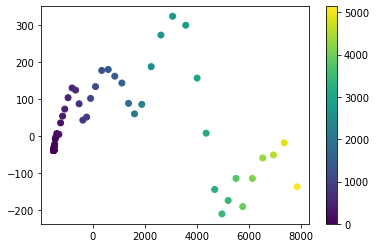

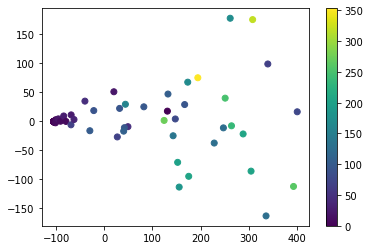

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

red = PCA(n_components = 3)
red_d = PCA(n_components = 3)

z = red.fit_transform(X)
z_d = red.fit_transform(X_d)

plt.scatter(z[:,0],z[:,1],c=y)
plt.colorbar()
plt.show()


plt.scatter(z_d[:,0],z_d[:,1],c=y_d)
plt.colorbar()
plt.show()


$$w^* = (\Phi^\top \Phi + \lambda I)^{-1}\Phi^\top y $$

$$y_n = \phi_n w^*$$


$\lambda$: hyperparameter

$\Phi(x)=\mathcal{N}(x|\mu,\sigma^2)$

$\mu,\sigma$ hyperparameters

$w$: model's parameter

In [5]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
#pocos datos y mucha incertidumbre, validación cruzada anidada

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(62, 5)
(27, 5)


In [0]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from joblib import dump, load
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

steps = [
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', LinearRegression())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', Ridge())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', Lasso())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', ElasticNet())], 
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', KernelRidge(kernel = 'rbf'))], #clasificador 
         
         ]        


#parametros a buscar por busqueda por grilla
parameters =[
             {'reg__fit_intercept':[0.5,1,1.5,2,2.5,3],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

             {'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'reg__fit_intercept':[0.5,1,1.5,2,2.5,3],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

              {'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

             {'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'reg__l1_ratio':[5e-3,5e-2,5e-1,5,10,100],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

             {'reg__gamma':[1e-3,1e-2,1e-1,1,10,100],
             'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },
              ]

label_model = ['NorSC-PCA-LM', 'NorSC-PCA-LMRidge', 'NoSC-PCA-LMLasso', 'NorSC-PCA-LMEN', 'NorSC-PCA-KRRBF']


In [7]:
#valildacion cruzada anidada
Niter = 10 #numero particiones outter loop nested cross-validation
maev =np.zeros((Niter,len(steps)))#arreglo para guardar acierto
best_estimators = []#mejor metodo por iteracion
###clave del funcionamiento
best_hyperpar = []#mejor metodo por iteracion 
#############################
          

for j in range(Niter): #outter loop
      print('it %d/%d'%(j+1,Niter))
      #particiono datos outter loop
      X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) # xtrain 60, xtest 26
      for r in range(len(steps)): #recorro todos los posibles modelos a probar en iteracion j del outter loop
          grid_search = GridSearchCV(Pipeline(steps[r]), parameters[r],cv=5,verbose=10,scoring='neg_mean_absolute_error',n_jobs=5) #cv inner loop
          #xtrain gridsearchcv xtrain split en 12 / cv, 60/5 = 12, xtrain 48 datos validar 12
          # cv = N -> leave one out N <30
          #generar mejor modelo
          grid_search.fit(X_train,y_train)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_test)
          #guardar mejor modelo
          best_estimators.append(grid_search.best_estimator_)
          best_hyperpar.append(grid_search.best_params_)
          
          #guardar acierto
          maev[j,r] = mae(y_test,y_pred)
          print('it %d/%d-Modelo %d/%d'%(j+1,Niter,r,len(steps)))
          print(best_hyperpar)
          print('mae:',maev[j,r])

          savedata = {
              'acc':maev,
              'best_models':best_estimators,
              'best_hyperpar':best_hyperpar,
                } 
          dump(savedata,'covid19_1.joblib')

print("\nMejor Modelo:\n")
print(grid_search.best_estimator_)

print("\nMejores parámetros:\n")
print(grid_search.best_params_)

it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1905s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0394s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  45 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0737s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  79 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1238s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 152 out of 180 | elapsed:    2.7s remaining:    0.5s
[Parallel(n_jobs=5)]: Done 171 out of 180 | elapsed:    2.7s remaining:    0.1s
[Parallel

it 1/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 37.50464034673376
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1004s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1545s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1711s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.00

it 1/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 37.49493714336128
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1422s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0097s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0506s.) Setting batch_size=4.


it 1/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}]
mae: 37.50444178992221
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0643s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 238 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1983s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1818s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 510 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 864 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 910 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1035 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1052 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5

it 1/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}]
mae: 37.98225293019328
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0810s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1326s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_job

it 1/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}]
mae: 29.630502751603235
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0767s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1621s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 134 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 143 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 165 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0094s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s


it 2/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}]
mae: 42.80324884448076
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0495s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0891s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1317s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.1s finished
[Paralle

it 2/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}]
mae: 42.809495748883684
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1011s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0530s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0074s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0074s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   6 tasks      | elapsed:    0.1s


it 2/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}]
mae: 42.803706598620366
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0722s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0669s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 194 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 338 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 514 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 690 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 898 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1001 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1031 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1063 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parallel(n_jobs=5)]: Using

it 2/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}]
mae: 42.99026599480279
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1022s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1106s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0111s.) Setting batch_s

it 2/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}]
mae: 50.595164349123664
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0520s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1710s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  74 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 125 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 141 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 163 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished


it 3/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 45.38167462247406
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0117s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0481s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0802s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1155s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 918 tasks      | ela

it 3/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 45.59087359569439
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1531s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0145s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0399s.) Setting batch_size=4.


it 3/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}]
mae: 45.39284353010816
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0772s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1311s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jo

it 3/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}]
mae: 50.74698534205205
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0848s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1183s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jo

it 3/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}]
mae: 28.531069982609754
it 4/10
Fitting 5 folds for e

[Parallel(n_jobs=5)]: Batch computation too fast (0.0661s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0731s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1190s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0078s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0078s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=

it 4/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}]


[Parallel(n_jobs=5)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  86 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 158 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 246 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 334 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 438 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 542 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 662 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 782 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0154s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation

it 4/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1180s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0122s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0122s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:    0.0s


it 4/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0564s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1299s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1534s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 194 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 386 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 738 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 945 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 984 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1071 out of 1080 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3

it 4/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0545s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0879s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1059s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5

it 4/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0523s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0439s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  54 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0796s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 165 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0137s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computatio

it 5/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0758s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0812s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0093s.) Setting batch_si

it 5/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0737s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0888s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0119s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s


it 5/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0441s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0643s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1109s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.3s finished
[Parall

it 5/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0715s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1190s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0141s.) Setting batch_s

it 5/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0498s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0748s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1586s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished


it 6/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0106s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0632s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0681s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1220s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 918 tasks      | ela

it 6/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0910s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1126s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0087s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0487s.) Setting batch_size=4.


it 6/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0601s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0806s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1665s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent wo

it 6/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1111s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1570s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1789s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 986 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent wo

it 6/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0487s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 134 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 143 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 165 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0088s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0456s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0768s.)

it 7/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1270s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0093s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jo

it 7/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0894s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1506s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0092s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s


it 7/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0400s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0489s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0901s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.5s finished
[Parall

it 7/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1022s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1915s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.6s finished


it 7/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0158s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0158s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0411s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1065s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 117 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 140 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 151 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 162 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend Lo

it 8/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0620s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0432s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1387s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5

it 8/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0700s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0997s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0097s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 8/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0445s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0894s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1560s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5

it 8/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0461s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0771s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1555s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.5s finished
[Parall

it 8/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0616s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1032s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0124s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 9/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0522s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0664s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1509s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1426s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    2.

it 9/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0499s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1232s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 122 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 147 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0205s.) Setting batch_size=2.


it 9/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0669s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0884s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1064s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1788s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.0

it 9/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0734s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1424s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0136s.) Setting batch_s

it 9/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, 

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0454s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0667s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0876s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0141s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computatio

it 10/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2},

[Parallel(n_jobs=5)]: Batch computation too fast (0.0664s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0855s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.0s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0235s.) Setting batch_s

it 10/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2},

[Parallel(n_jobs=5)]: Batch computation too fast (0.0725s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1545s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0168s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0330s.) Setting batch_size=4.


it 10/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2},

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0862s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1126s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.5s finished


it 10/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2},

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0151s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0428s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0882s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1482s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1835s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Don

it 10/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}, {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}, {'reg__fit_intercept': 0.5, 'rep__n_components': 2},

Por Niter de outter loop tengo valores de los hyperparameters

$$\gamma = [0.01,0.1,10,1000,10000,0.01]$$

$$\gamma = [0.01,0.01,0.01,0.1,1,0.01]$$

$$\gamma^* = moda/mediana(\gamma_i) = 0.01$$

Toma todos los datos los N = 85, entreno sobre todo el conjunto con los parametros encontrados utilizando validación cruzada anidad

$$\theta^*/w^* =f(X|\gamma^*)$$

$$ y_{new} = f(x_{new}|\gamma^*,\theta^*/w^*)$$

Despues de la validacion cruzada anidada, vemos que el GridSerch nos da la seleccion de el mejor modelo y los mejores parametros para este modelo que son capaces de seguir nuestros datos de manera mas optima.

En este caso el Mejor modelo queda guardado en "grid_search.best_estimator_" y los mejores parametros para este en "grid_search.best_params_". 

El modelo seleccionado por GridSearch fue un Kernel Ridge con mapeo rbf y los mejores parametros son:

#### Para el regresor KernelRidge-rbf: 

* alpha= 0.001 
* gamma = 0.1 

#### Para el proceso de PCA: 
* n_components = 3



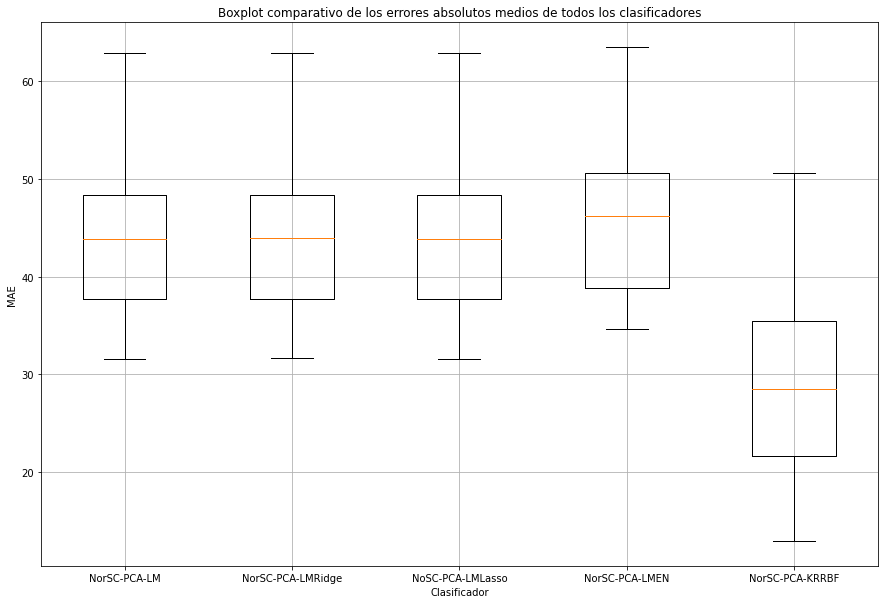

In [8]:
#Comparacion de los errores medios absolutos de todos los clasificadores
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)
plt.boxplot(maev)
plt.xticks(ticks=np.arange(len(steps))+1,labels=label_model)
plt.xlabel("Clasificador")
plt.ylabel("MAE")
plt.title("Boxplot comparativo de los errores absolutos medios de todos los clasificadores")
plt.grid()
plt.show()

En el grafico anterior se presenta la comparacion del error absoluto medio de todos los modelos probados en un diagrama de caja y bigotes (BoxPlot). Los modelos que fueron probados son los siguientes:
  * NorSC-PCA-LM: Modelo de regresion lineal simple con normalizado y PCA.

  * NorSC-PCA-LMRidge: Modelo de regresion lineal rigido con normalizado y PCA.

  * NorSC-PCA-LMLasso: Modelo de regresion lineal tipo Lasso con normalizado y PCA.

  * NorSC-PCA-LMEN: Modelo de regresion lineal ElasticNet con normalizado y PCA.

  * NorSC-KRRBF: Modelo de regresion KernelRidge de mapeo rbf con normalizado y PCA.


Del grafico podemos concluir que lo que GridSerch nos ha dicho anteriormente es cierto, el mejor modelo (con error medio absoluto mas bajo) para seguir nuestros datos es el KernelRigde-rbf.

  



Extrayendo el mejor modelo podriamos predecir los contagiados de el dia siguiente de la siguiente forma

In [14]:
# Predicion de contagiados al dia siguiente con el mejor modelo
best_model = grid_search.best_estimator_

y25abr = best_model.predict(np.array(X[-1]).reshape(1,-1))
y25abr

array([[5130.26355905]])

y podriamos compararlo con los datos de contagiados que tenemos de los ultimos 5 dias

In [13]:
#Contagiados de los ultimos 5 dias
X[-1]

array([3792, 3977, 4149, 4356, 4561], dtype=object)

Con esto podemos concluir que nuestro modelo esta prediciendo aproximadamente unos 409 contagiados nuevos al dia siguiente:
* 409 = 4558 - 4149

#### Tambien podemos ver de manera grafica que tanto se ajustan las predicciones del modelo a los datos originales

In [0]:
#Evalualndo el ajuste de los datos
y_pred = best_model.predict(X)

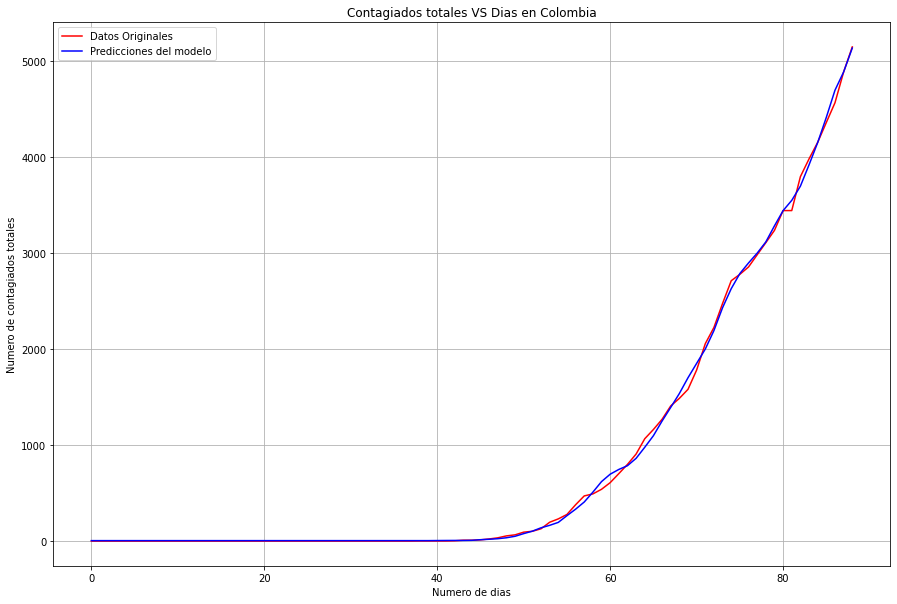

In [12]:
lab=["Datos Originales", "Predicciones del modelo"]
plt.plot(y,'r')
plt.plot(y_pred,'b')
plt.legend(labels=lab)
plt.xlabel("Numero de dias")
plt.ylabel("Numero de contagiados totales")
plt.title("Contagiados totales VS Dias en Colombia")
plt.grid()